## Team 13 Final Project

## Project Overview
The focus of this project is to examine the validity of the Quantity Theory of Money, a fundamental macroeconomic model for predicting the inflation rate. According to the theory, there should be a positive relationship between money supply (M2) and price level (CPI). In this project, real-world data like CPI, GDP, and M2 from the past 20 years will be explored to test the relationship between these variable data using linear regression analysis. 

## Group Project Structure
The project will begin with a data report provided, which will explain the origin of the data and how to access the data.

The second part of the project will provide summary statistics about M2, CPI, GDP, Velocity of M2, and visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis based on the Quantity Theory of Money. Then, the project will conduct a linear regression on two periods of time (1960-1980 and 1999-2019). For the data from 1960 to 1980 in which the velocity of M2 was relatively constant, the project will test the hypothesis to study whether the model predicts a positive relationship between M2 and CPI in the real world; for the data from 1999 to 2019 in which the velocity of M2 dropped significantly, the project will examine the impact of the velocity of M2 on the model. 

Lastly, there will be a detailed discussion of the results and how it follows or goes against the model. 

## Data Report:
The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides data on the U.S. CPI (where we will compute the inflation rate), M2, GDP, Velocity of M2 (it will serve as a control variable in our analysis) from 1960 to 1980 and from 1999 to 2019. The data can be accessed at https://fred.stlouisfed.org.

## Key variables: 

The four key variables in this project are M2, CPI, GDP, and Velocity of M2. 

M2 includes a broader set of financial assets held principally by households. M2 consists of M1 plus: (1) savings deposits (which include money market deposit accounts, or MMDAs); (2) small-denomination time deposits (time deposits in amounts of less than $100,000); and (3) balances in retail money market mutual funds (MMMFs). 

The Consumer Price Index (CPI) is a measure of the average change in the price of a basket of consumer goods and services and helps measure price inflation for consumers.

Gross Domestic Product (GDP) is the total value of goods and services produced in a country annually.

The velocity of M2 is the frequency at which one unit of currency is used to purchase domestically- produced goods and services within a given time period. In other words, it is the number of times one dollar is spent to buy goods and services per unit of time. If the velocity of money is increasing, then more transactions are occurring between individuals in an economy.


In [1]:
# Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
# Access GDP Data
url_g = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPCA&scale=left&cosd=1960-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2019-01-01&line_index=1&transformation=lin&vintage_date=2020-11-03&revision_date=2020-11-03&nd=1929-01-01'
data_g = pd.read_csv(url_g, parse_dates=True)
data_g.columns = ['DATE','US_GDP'] 
data_g.head()

,DATE,US_GDP
0,1960-01-01,3259.971
1,1961-01-01,3343.546
2,1962-01-01,3548.409
3,1963-01-01,3702.944
4,1964-01-01,3916.280


In [3]:
# Summary Statistics for GDP
data_g.describe()

,US_GDP
count,60.000000
mean,10002.882083
std,4782.658931
min,3259.971000
25%,5679.521500
50%,9273.744500
75%,14532.913750
max,19091.662000


In [4]:
# Convert Month to YEAR
# Rename the YEAR 
data_g['DATE'] = pd.DatetimeIndex(data_g['DATE']).year
data_g.columns = ['YEAR','US_GDP']
data_g = data_g.round(3)
data_g.head()

,YEAR,US_GDP
0,1960,3259.971
1,1961,3343.546
2,1962,3548.409
3,1963,3702.944
4,1964,3916.280


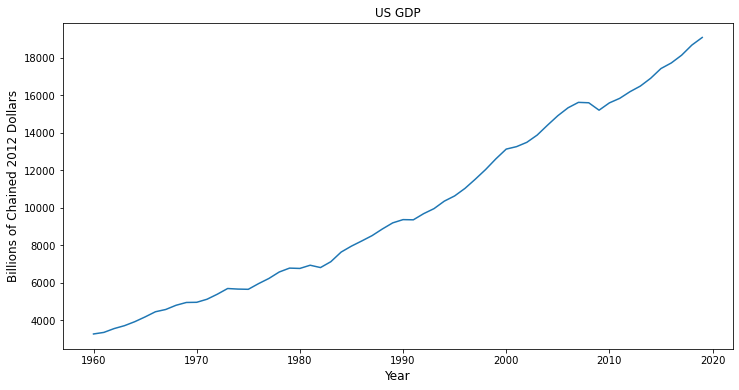

In [5]:
# Graphing the GDP
data_g1 = data_g.set_index('YEAR')
ax_g1 = data_g1.plot(title='US GDP', legend=False, figsize=(12,6))
ax_g1.set_xlabel('Year', fontsize=12,)
ax_g1.set_ylabel('Billions of Chained 2012 Dollars', fontsize=12)
plt.show()

In [6]:
# Access CPI Data
url_c = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1947-01-01'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.columns = ['DATE','US_CPI']
data_c.head()

,DATE,US_CPI
0,1960-01-01,29.37
1,1960-02-01,29.41
2,1960-03-01,29.41
3,1960-04-01,29.54
4,1960-05-01,29.57


In [7]:
# Summary Statistics for CPI
data_c.describe()

,US_CPI
count,720.000000
mean,128.285533
std,74.108806
min,29.370000
25%,52.200000
50%,126.900000
75%,191.700000
max,258.444000


In [8]:
# Convert Month to YEAR
# Rename the YEAR
data_c['DATE'] = pd.DatetimeIndex(data_c['DATE']).year
data_c.columns = ['YEAR','US_CPI']
data_c.head()

,YEAR,US_CPI
0,1960,29.37
1,1960,29.41
2,1960,29.41
3,1960,29.54
4,1960,29.57


In [9]:
# Compute the yearly data from monthly data
data_c = data_c.groupby(['YEAR']).mean()
data_c = data_c.round(3)
data_c.head()

,US_CPI
YEAR,
1960,29.585
1961,29.902
1962,30.253
1963,30.633
1964,31.038


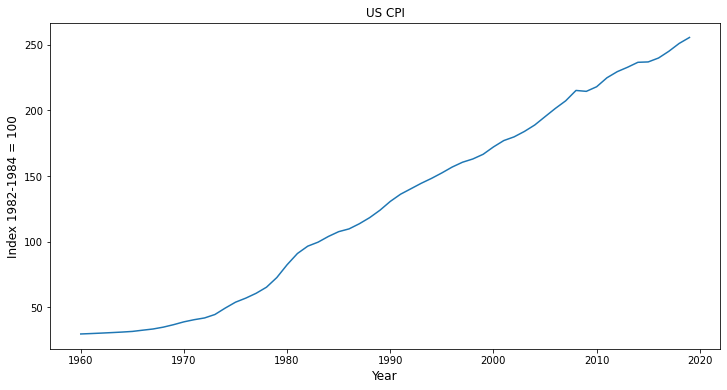

In [10]:
# Graphing the CPI
# data_c1 = data_c.set_index('YEAR') ## don't need to set index because YEAR is already an index
ax_c1 = data_c.plot(title='US CPI', legend=False, figsize=(12,6))
ax_c1.set_xlabel('Year', fontsize=12)
ax_c1.set_ylabel('Index 1982-1984 = 100', fontsize=12)
plt.show()

In [11]:
#Access M2 Data
url_m = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2SL&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1959-01-01'
data_m = pd.read_csv(url_m, parse_dates=True)
data_m.columns = ['DATE','US_M2'] 
data_m.head()

,DATE,US_M2
0,1960-01-01,298.2
1,1960-02-01,298.4
2,1960-03-01,299.3
3,1960-04-01,300.1
4,1960-05-01,300.9


In [12]:
# Summary Statistics for M2
data_m.describe()

,US_M2
count,720.000000
mean,4266.704306
std,4004.601048
min,298.200000
25%,905.250000
50%,3159.650000
75%,6406.550000
max,15307.100000


In [13]:
# Convert M2 Month to YEAR
# Rename the YEAR
data_m['DATE'] = pd.DatetimeIndex(data_m['DATE']).year
data_m.columns = ['YEAR','M2']
data_m.head()

,YEAR,M2
0,1960,298.2
1,1960,298.4
2,1960,299.3
3,1960,300.1
4,1960,300.9


In [14]:
# Compute the yearly data from monthly data
data_m = data_m.groupby(['YEAR']).mean()
data_m = data_m.round(3)
data_m.head()

,M2
YEAR,
1960,304.283
1961,324.833
1962,350.100
1963,379.608
1964,409.317


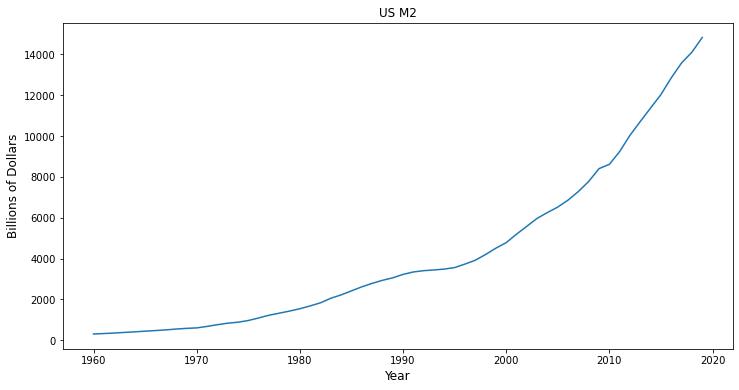

In [15]:
# Graphing the M2
ax_m1 = data_m.plot(title='US M2', legend=False, figsize=(12,6))
ax_m1.set_xlabel('Year', fontsize=12)
ax_m1.set_ylabel('Billions of Dollars', fontsize=12)
plt.show()

In [16]:
# Access V Data
url_v = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2V&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1959-01-01'
data_v = pd.read_csv(url_v, parse_dates=True)
data_v.columns = ['DATE','US_V'] 
data_v.head()

,DATE,US_V
0,1960-01-01,1.817
1,1960-04-01,1.797
2,1960-07-01,1.780
3,1960-10-01,1.737
4,1961-01-01,1.723


In [17]:
# Summary Statistics for V
data_v.describe()

,US_V
count,240.000000
mean,1.805742
std,0.186371
min,1.427000
25%,1.709500
50%,1.775000
75%,1.928750
max,2.198000


In [18]:
# Convert V MONTH to YEAR 
# Rename the YEAR
data_v['DATE'] = pd.DatetimeIndex(data_v['DATE']).year
data_v.columns = ['YEAR','V']
data_v.head()

,YEAR,V
0,1960,1.817
1,1960,1.797
2,1960,1.780
3,1960,1.737
4,1961,1.723


In [19]:
# Compute the Yearly data from quarterly data
data_v = data_v.groupby(['YEAR']).mean()
data_v = data_v.round(3)
data_v.head()

,V
YEAR,
1960,1.783
1961,1.730
1962,1.725
1963,1.679
1964,1.673


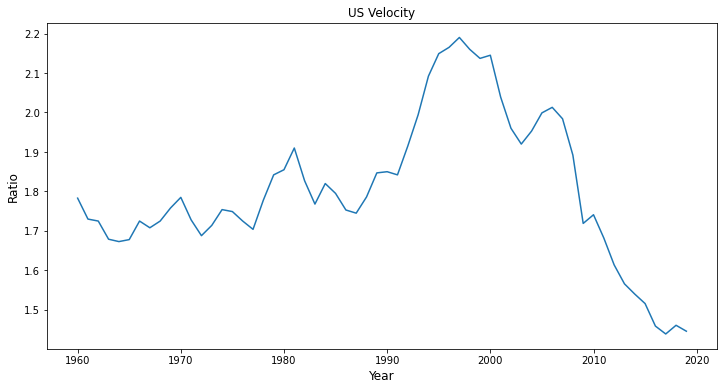

In [20]:
# Graphing the V
ax_v1 = data_v.plot(title='US Velocity', legend=False, figsize=(12,6))
ax_v1.set_xlabel('Year', fontsize=12)
ax_v1.set_ylabel('Ratio', fontsize=12)
plt.show()

# Data Merge

In [21]:
merge_data=pd.merge(data_g, data_c, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)



In [22]:
merge_data=pd.merge(merge_data, data_m, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [23]:
merge_data=pd.merge(merge_data, data_v, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [24]:
merge_data.head()

,YEAR,US_GDP,US_CPI,M2,V
0,1960,3259.971,29.585,304.283,1.783
1,1961,3343.546,29.902,324.833,1.730
2,1962,3548.409,30.253,350.100,1.725
3,1963,3702.944,30.633,379.608,1.679
4,1964,3916.280,31.038,409.317,1.673


----------------------------------------------------------------------------------------------------------------------

# Data Analysis

In this section, we divide the merged data into two timeframes:

1. the first one is from **1960-1979** 
2. the second one is from **2000-2019**

Within these two timeframes, we are going to apply linear regression on the empirical data and compare our findings to the theoretical model **US_CPI = (M2 * V)/ US_GDP**.


### Timeframe 1: 1960-1979
During the first timeframe, we view v as a constant and apply linear regression to confirm our hypothesis.

In [25]:
import statsmodels.api as sm

In [26]:
tf_1 = merge_data.loc[0:19]
tf_1 = tf_1.reset_index(drop = True)
tf_1.head()

,YEAR,US_GDP,US_CPI,M2,V
0,1960,3259.971,29.585,304.283,1.783
1,1961,3343.546,29.902,324.833,1.730
2,1962,3548.409,30.253,350.100,1.725
3,1963,3702.944,30.633,379.608,1.679
4,1964,3916.280,31.038,409.317,1.673


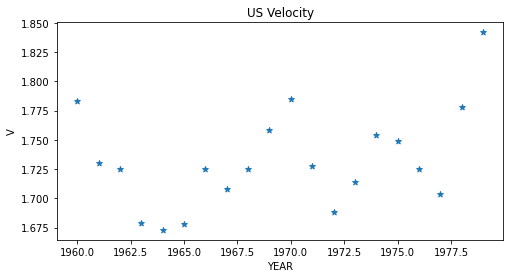

In [27]:
# Discuss the fluctuation of V. 
'''
H_o: There is no relationship bettwen V and time.
H_a: There is a relationship bettwen V and time. 
Do the t test in 95% level of confidence. 
'''
fig, ax = plt.subplots(figsize = (8,4))

x = tf_1['YEAR']
y = tf_1['V']
ax.scatter(x, y, marker = '*')
ax.set_xlabel('YEAR')
ax.set_ylabel('V')
ax.set_title('US Velocity')
plt.show()


# Prove that there is no relationship betweeen V and year, meaning that V can be regarded as constant.



In [28]:
tf_1['const'] = 1
reg1 = sm.OLS(endog=tf_1['V'], exog=tf_1[['const', 'YEAR']], \
    missing='drop')
type(reg1)
results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.997
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.100
Time:                        11:51:03   Log-Likelihood:                 36.900
No. Observations:                  20   AIC:                            -69.80
Df Residuals:                      18   BIC:                            -67.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5969      3.078     -1.168      0.2

### Discussion: 
We can see that the estimation of YEAR is within 95% confidence interval [-0.001, 0.006], which means that we don't have enough evidence to reject the NULL hypothesis that YEAR has no relationship with V.

The result shows that **V can be regarded as constant**. 

----------------------------------------------------------------------------------------------------------------------

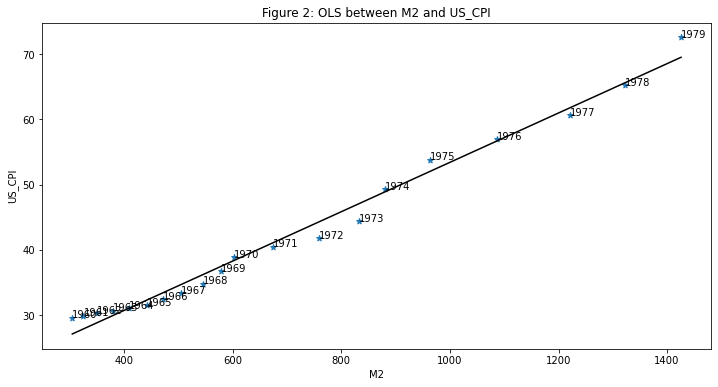

In [29]:
# Plot M2 and US_CPI

x = tf_1['M2']
y = tf_1['US_CPI']
labels = tf_1['YEAR']

fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x, y, marker='*')
for i, label in enumerate(labels):
    ax.annotate(label, (x.iloc[i], y.iloc[i]))
    

# Fit a linear trend line
ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')
ax.set_xlabel('M2')
ax.set_ylabel('US_CPI')
ax.set_title('Figure 2: OLS between M2 and US_CPI')
plt.show()



### Introducing log variables

In [30]:
tf_1['log_GDP'] = np.log(tf_1['US_GDP'])
tf_1['log_CPI'] = np.log(tf_1['US_CPI'])
tf_1['log_M2'] = np.log(tf_1['M2'])
tf_1['log_V'] = np.log(tf_1['V'])
tf_1.head()

,YEAR,US_GDP,US_CPI,M2,V,const,log_GDP,log_CPI,log_M2,log_V
0,1960,3259.971,29.585,304.283,1.783,1,8.089474,3.387267,5.717958,0.578297
1,1961,3343.546,29.902,324.833,1.730,1,8.114787,3.397925,5.783311,0.548121
2,1962,3548.409,30.253,350.100,1.725,1,8.174255,3.409595,5.858219,0.545227
3,1963,3702.944,30.633,379.608,1.679,1,8.216883,3.422078,5.939139,0.518198
4,1964,3916.280,31.038,409.317,1.673,1,8.272898,3.435212,6.014490,0.514618


In [31]:
reg2 = sm.OLS(endog=tf_1['log_CPI'], exog=tf_1[['const', 'log_M2','log_GDP']], \
    missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_CPI   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     842.6
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           9.89e-18
Time:                        11:51:04   Log-Likelihood:                 43.045
No. Observations:                  20   AIC:                            -80.09
Df Residuals:                      17   BIC:                            -77.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5497      0.910      7.200      0.0

----------------------------------------------------------------------------------------------------------------------



### Timeframe 2: 2000-2019

In [32]:
# timeframe 2 data
tf_2 = merge_data.loc[40:59]
tf_2 = tf_2.reset_index(drop = True)
tf_2 

,YEAR,US_GDP,US_CPI,M2,V
0,2000,13130.987,172.192,4779.350,2.145
1,2001,13262.079,177.042,5191.825,2.039
2,2002,13493.064,179.867,5579.200,1.960
3,2003,13879.129,184.000,5968.833,1.920
4,2004,14406.382,188.908,6253.625,1.953
5,2005,14912.509,195.267,6521.608,1.999
6,2006,15338.257,201.558,6863.550,2.013
7,2007,15626.029,207.344,7283.975,1.984
8,2008,15604.687,215.254,7777.517,1.892
9,2009,15208.834,214.565,8403.717,1.719


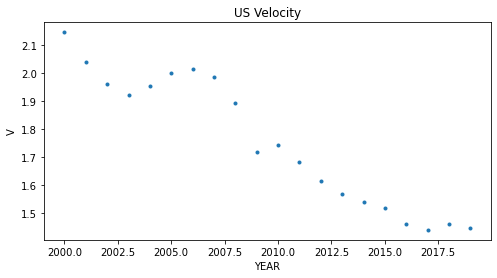

In [33]:
# The fluctuation of V. 
'''
H_o: There is no relationship bettwen V and time.
H_a: There is a relationship bettwen V and time. 
Do the t test in 95% level of confidence. 
'''
fig2, ax2 = plt.subplots(figsize = (8,4))

x = tf_2['YEAR']
y = tf_2['V']
ax2.scatter(x, y, marker = '.')
ax2.set_xlabel('YEAR')
ax2.set_ylabel('V')
ax2.set_title('US Velocity')
plt.show()

In [34]:
# Conduct Linear Regression to confirm the relationship between V and Year
tf_2['const'] = 1
reg3 = sm.OLS(endog=tf_2['V'], exog=tf_2[['const', 'YEAR']], \
    missing='drop')
results = reg3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     226.9
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.20e-11
Time:                        11:51:04   Log-Likelihood:                 26.973
No. Observations:                  20   AIC:                            -49.95
Df Residuals:                      18   BIC:                            -47.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4752      5.159     15.404      0.0

### Discussion: 
We can see that the estimation of YEAR is within 95% confidence interval [-0.044, 0.-0,033], which means that we have enough evidence to reject the NULL hypothesis that YEAR has no relationship with V.

The result shows that **V is NEGATIVELY correlated with Year**. 

----------------------------------------------------------------------------------------------------------------------

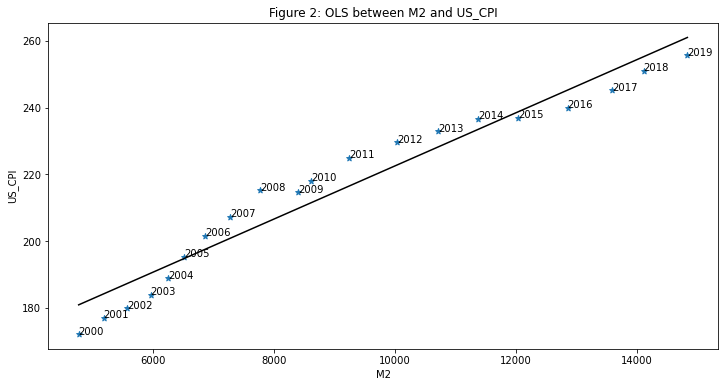

In [35]:
# Plot M2 and US_CPI

x = tf_2['M2']
y = tf_2['US_CPI']
labels = tf_2['YEAR']

fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x, y, marker='*')
for i, label in enumerate(labels):
    ax.annotate(label, (x.iloc[i], y.iloc[i]))
    

# Fit a linear trend line
ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')
ax.set_xlabel('M2')
ax.set_ylabel('US_CPI')
ax.set_title('Figure 2: OLS between M2 and US_CPI')
plt.show()



In [36]:
tf_2['log_GDP'] = np.log(tf_2['US_GDP'])
tf_2['log_CPI'] = np.log(tf_2['US_CPI'])
tf_2['log_M2'] = np.log(tf_2['M2'])
tf_2['log_V'] = np.log(tf_2['V'])
tf_2.head()

,YEAR,US_GDP,US_CPI,M2,V,const,log_GDP,log_CPI,log_M2,log_V
0,2000,13130.987,172.192,4779.350,2.145,1,9.482730,5.148610,8.472060,0.763140
1,2001,13262.079,177.042,5191.825,2.039,1,9.492664,5.176387,8.554841,0.712459
2,2002,13493.064,179.867,5579.200,1.960,1,9.509931,5.192218,8.626801,0.672944
3,2003,13879.129,184.000,5968.833,1.920,1,9.538141,5.214936,8.694307,0.652325
4,2004,14406.382,188.908,6253.625,1.953,1,9.575427,5.241260,8.740917,0.669367


### Introduce log_V 
We add log_V as one of the variables in the linear regression model because money velocity V is not constant anymore during timeframe 2

In [37]:
reg4 = sm.OLS(endog=tf_2['log_CPI'], exog=tf_2[['const', 'log_M2','log_GDP', 'log_V']], \
    missing='drop')
type(reg4)
results2 = reg4.fit()
type(results2)
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_CPI   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5558.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           2.38e-24
Time:                        11:51:04   Log-Likelihood:                 83.488
No. Observations:                  20   AIC:                            -159.0
Df Residuals:                      16   BIC:                            -155.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8379      0.469     16.704      0.0

----------------------------------------------------------------------------------------------------------------------


# Conclusion

Our first conclusion would be the empirical data, with or without the impact of money velocity V, confirms with the theoretical monel 
                    **US_CPI = (M2 * V)/US_GDP**

Based on our findings, we would like to further discuss the impact of the presence of money velocity when it is not regarded as a constant. First, we would like to briefly list a few facts from the data and our finding:

1. V is decreasing
2. M2, CPI, and GDP is increasing
3. M2 without the influence of V: 1.1276 (from time frame 1)
4. M2 with the influence of V: 1.3766 (from time frame 2)
5. **Pegative impact**: increase in GDP as the denominator, decrease in V as numerator
6. **Positive impact**: incrase in M2 as numerator
7. **Result**: increase in CPI

According to the model CPI = M*V / GDP, the increase in M2 might be the dominent effect that outweights the negative impact from the increase in GDP and decrease in V and thus, further pushes US CPI to increase.

